<a href="https://colab.research.google.com/github/venidaydream/Data-Science/blob/main/Data_Science_Refinitiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Is there a relationship between Rendimiento y los scores? - Sustainilitcs & Rendimiento

2. How do the two scores differ? - almost totally contrary

In [43]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [44]:
df = pd.read_excel("/content/Refinitiv.xlsx")
df

,Company,Sustainanalytics,Refinitiv,Rendimiento anualizado
0,Royal Dutch Shell A,35.8,88,-0.059654
1,Siemens Energy,17.1,87,0.076538
2,Repsol,21.7,87,-0.021795
3,BP,37.4,87,-0.053374
4,Total,27.1,86,-0.025892
5,SNAM RETE GAS,19.8,85,-0.009403
6,Eni SpA,25.7,84,-0.072703
7,Equinor,33.5,81,0.034737
8,ENAGAS,20.1,79,-0.060439
9,OMV AG,28.1,79,0.057989


In [45]:
df.sort_values('Sustainanalytics', ascending = False)

,Company,Sustainanalytics,Refinitiv,Rendimiento anualizado
19,AKER BP,47.7,54,0.550043
21,Nel ASA,39.1,23,1.042918
3,BP,37.4,87,-0.053374
0,Royal Dutch Shell A,35.8,88,-0.059654
7,Equinor,33.5,81,0.034737
17,TechnipFMC,29.1,62,-0.135661
15,Lundin Petroleum,28.9,67,0.167742
9,OMV AG,28.1,79,0.057989
18,PKNORLEN,27.8,59,-0.022263
4,Total,27.1,86,-0.025892


In [46]:
df.sort_values('Refinitiv', ascending = False)

,Company,Sustainanalytics,Refinitiv,Rendimiento anualizado
0,Royal Dutch Shell A,35.8,88,-0.059654
2,Repsol,21.7,87,-0.021795
3,BP,37.4,87,-0.053374
1,Siemens Energy,17.1,87,0.076538
4,Total,27.1,86,-0.025892
5,SNAM RETE GAS,19.8,85,-0.009403
6,Eni SpA,25.7,84,-0.072703
7,Equinor,33.5,81,0.034737
8,ENAGAS,20.1,79,-0.060439
9,OMV AG,28.1,79,0.057989


In [47]:
df.sort_values('Rendimiento anualizado', ascending = False)

,Company,Sustainanalytics,Refinitiv,Rendimiento anualizado
20,SCATEC,12.8,50,1.564341
21,Nel ASA,39.1,23,1.042918
19,AKER BP,47.7,54,0.550043
11,Vestas Wind,16.2,73,0.405850
13,Siemens Gamesa,15.2,69,0.246649
10,Neste Oil Oyj,23.6,74,0.236928
15,Lundin Petroleum,28.9,67,0.167742
1,Siemens Energy,17.1,87,0.076538
12,SBM Offshore,19.8,73,0.070844
9,OMV AG,28.1,79,0.057989


In [48]:
df.describe()

,Sustainanalytics,Refinitiv,Rendimiento anualizado
count,22.000000,22.000000,22.000000
mean,26.227273,71.681818,0.176572
std,8.615003,15.812552,0.409367
min,12.800000,23.000000,-0.135661
25%,19.875000,63.250000,-0.047882
50%,26.250000,73.500000,0.012667
75%,29.050000,84.750000,0.219631
max,47.700000,88.000000,1.564341


In [49]:
features = ['Sustainanalytics',	'Refinitiv','Rendimiento anualizado']
identificadores = ['Company']

x=df.loc[:,features].values
y=df.loc[:,identificadores].values

In [50]:
x_normal = StandardScaler().fit_transform(x)
x_std=pd.DataFrame(data=x_normal,columns=features)
x_std

,Sustainanalytics,Refinitiv,Rendimiento anualizado
0,1.137318,1.056262,-0.590632
1,-1.084395,0.991532,-0.250113
2,-0.537877,0.991532,-0.495973
3,1.327411,0.991532,-0.574929
4,0.103687,0.926803,-0.506217
5,-0.763612,0.862074,-0.464991
6,-0.062644,0.797345,-0.623257
7,0.864059,0.603158,-0.354628
8,-0.727970,0.473699,-0.592594
9,0.222495,0.473699,-0.296490


In [51]:
x_std.describe()

,Sustainanalytics,Refinitiv,Rendimiento anualizado
count,2.200000e+01,2.200000e+01,2.200000e+01
mean,1.211152e-16,-3.633457e-16,-4.037175e-17
std,1.023533e+00,1.023533e+00,1.023533e+00
min,-1.595270e+00,-3.151131e+00,-7.806689e-01
25%,-7.547019e-01,-5.457842e-01,-5.611975e-01
50%,2.700186e-03,1.176893e-01,-4.098092e-01
75%,3.353630e-01,8.458920e-01,1.076604e-01
max,2.551135e+00,1.056262e+00,3.469813e+00


In [52]:
pca_x_3 = PCA(n_components=3)
pca_x_3_reduced = pca_x_3.fit_transform(x_std)
pca_x_3_reduced

array([[-0.94966771, -1.19588323, -0.65270322],
       [-1.07211537,  1.00938887, -0.23088382],
       [-1.14028358,  0.41419239, -0.21595289],
       [-0.85867273, -1.37478782, -0.66958165],
       [-0.9857534 , -0.19989441, -0.33808851],
       [-1.06741042,  0.62920149, -0.08504661],
       [-1.00235017, -0.08826757, -0.12504408],
       [-0.51548558, -0.89136103, -0.41941471],
       [-0.86996142,  0.52982343,  0.26067833],
       [-0.49892893, -0.27448775, -0.19372229],
       [-0.06114004,  0.3529383 , -0.12007334],
       [ 0.11290811,  1.31482569, -0.1167925 ],
       [-0.37692733,  0.64324014,  0.32316036],
       [ 0.00719836,  1.28356453,  0.36011742],
       [-0.16936426, -0.24551996,  0.49281584],
       [ 0.25853296, -0.32679551,  0.13973159],
       [-0.03595264,  0.04108579,  0.93977299],
       [-0.01925501, -0.61202435,  0.8624006 ],
       [ 0.28349979, -0.38803823,  0.85145119],
       [ 1.90734036, -2.1881134 , -0.51420002],
       [ 3.06318376,  2.52487828, -0.892

In [53]:
variance = pca_x_3.explained_variance_
var_por=pca_x_3.explained_variance_ratio_
variance

array([1.79801326, 1.08542435, 0.25941954])

In [54]:
var_por

array([0.57209513, 0.34536229, 0.08254258])

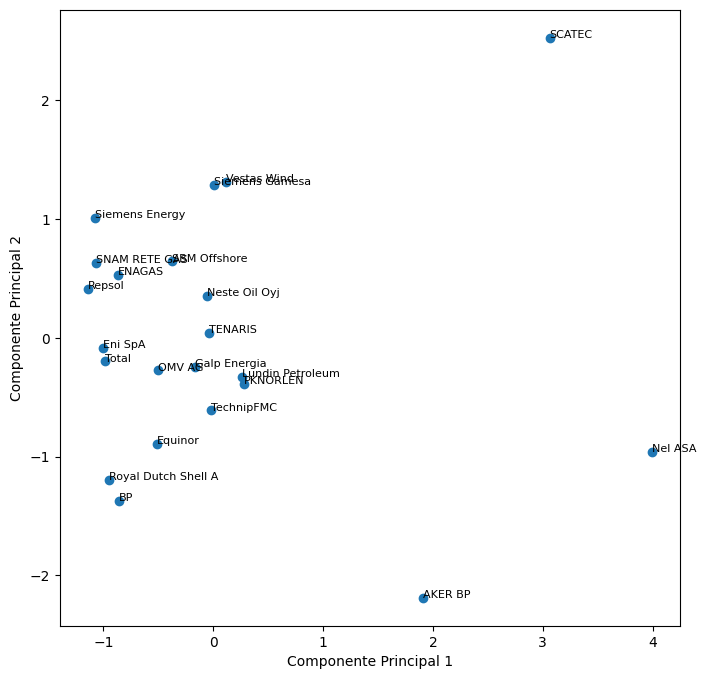

In [55]:
c1 = pca_x_3_reduced[:,0]
c2 = pca_x_3_reduced[:,1]
lab=df['Company']
fig = plt.figure(figsize=(8,8))
plt.scatter(c1,c2)
for i, txt in enumerate(lab):
  plt.annotate(str(txt), (c1[i], c2[i]), fontsize=8)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [56]:
for i in range(0,2):
  df['principal_components' + str(i+1)] = pca_x_3_reduced[:,i]
df.head()

,Company,Sustainanalytics,Refinitiv,Rendimiento anualizado,principal_components1,principal_components2
0,Royal Dutch Shell A,35.8,88,-0.059654,-0.949668,-1.195883
1,Siemens Energy,17.1,87,0.076538,-1.072115,1.009389
2,Repsol,21.7,87,-0.021795,-1.140284,0.414192
3,BP,37.4,87,-0.053374,-0.858673,-1.374788
4,Total,27.1,86,-0.025892,-0.985753,-0.199894


In [57]:
c = ['Sustainanalytics',	'Refinitiv','Rendimiento anualizado', 'principal_components1',	'principal_components2']
a = pd.DataFrame(np.corrcoef(df[c].T).round(4))
a.columns=c
a['var']=c
a.set_index('var')

,Sustainanalytics,Refinitiv,Rendimiento anualizado,principal_components1,principal_components2
var,,,,,
Sustainanalytics,1.0000,-0.2363,-0.0593,0.2353,-0.9625
Refinitiv,-0.2363,1.0000,-0.6934,-0.9356,0.0655
Rendimiento anualizado,-0.0593,-0.6934,1.0000,0.8863,0.3246
principal_components1,0.2353,-0.9356,0.8863,1.0000,-0.0000
principal_components2,-0.9625,0.0655,0.3246,-0.0000,1.0000


In [61]:
b=a.iloc[0:3,3:5]
b=a.set_index('var').iloc[0:3,3:5]
b

,principal_components1,principal_components2
var,,
Sustainanalytics,0.2353,-0.9625
Refinitiv,-0.9356,0.0655
Rendimiento anualizado,0.8863,0.3246


In [59]:
by_principal_components1 = df.sort_values('principal_components1', ascending = True)
by_principal_components1

,Company,Sustainanalytics,Refinitiv,Rendimiento anualizado,principal_components1,principal_components2
2,Repsol,21.7,87,-0.021795,-1.140284,0.414192
1,Siemens Energy,17.1,87,0.076538,-1.072115,1.009389
5,SNAM RETE GAS,19.8,85,-0.009403,-1.067410,0.629201
6,Eni SpA,25.7,84,-0.072703,-1.002350,-0.088268
4,Total,27.1,86,-0.025892,-0.985753,-0.199894
0,Royal Dutch Shell A,35.8,88,-0.059654,-0.949668,-1.195883
8,ENAGAS,20.1,79,-0.060439,-0.869961,0.529823
3,BP,37.4,87,-0.053374,-0.858673,-1.374788
7,Equinor,33.5,81,0.034737,-0.515486,-0.891361
9,OMV AG,28.1,79,0.057989,-0.498929,-0.274488


In [60]:
by_principal_components1[['Company','principal_components1']].head(22)

,Company,principal_components1
2,Repsol,-1.140284
1,Siemens Energy,-1.072115
5,SNAM RETE GAS,-1.067410
6,Eni SpA,-1.002350
4,Total,-0.985753
0,Royal Dutch Shell A,-0.949668
8,ENAGAS,-0.869961
3,BP,-0.858673
7,Equinor,-0.515486
9,OMV AG,-0.498929
